# Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import ttest_ind, f_oneway
from sklearn.linear_model import LinearRegression

# Step 2: Download Historical Data for Selected Financial Assets


In [2]:
# Define the list of financial assets
assets = ['NVDA', 'ADBE', 'NFLX', 'PYPL', 'INTC']

# Download historical data from Yahoo Finance
data = yf.download(assets, start="2020-01-01", end="2023-01-01")['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,ADBE,INTC,NFLX,NVDA,PYPL
Date,,,,,
2020-01-02,334.429993,54.006908,329.809998,5.973633,110.750000
2020-01-03,331.809998,53.350018,325.899994,5.878019,108.760002
2020-01-06,333.709991,53.199116,335.829987,5.902669,110.169998
2020-01-07,333.390015,52.311424,330.750000,5.974132,109.669998
2020-01-08,337.869995,52.346935,339.260010,5.985337,111.820000


# Step 3: Calculate Daily Returns

In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()
returns.head()

Ticker,ADBE,INTC,NFLX,NVDA,PYPL
Date,,,,,
2020-01-03,-0.007834,-0.012163,-0.011855,-0.016006,-0.017968
2020-01-06,0.005726,-0.002829,0.030469,0.004194,0.012964
2020-01-07,-0.000959,-0.016686,-0.015127,0.012107,-0.004538
2020-01-08,0.013438,0.000679,0.025729,0.001876,0.019604
2020-01-09,0.007636,0.005596,-0.010611,0.010982,0.006707


# Step 4: Perform Descriptive Statistics with Visualizations


In [4]:
# Descriptive statistics
desc_stats = returns.describe()
desc_stats

Ticker,ADBE,INTC,NFLX,NVDA,PYPL
count,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.000354,-0.000632,0.000412,0.001806,-0.000080
std,0.026219,0.026506,0.032667,0.035262,0.031620
min,-0.167932,-0.180415,-0.351166,-0.184521,-0.245904
25%,-0.011735,-0.012179,-0.014884,-0.017763,-0.016648
50%,0.001679,-0.000374,-0.000082,0.002839,0.000000
75%,0.014504,0.011732,0.015252,0.022246,0.015367
max,0.177193,0.195213,0.168543,0.171564,0.141098


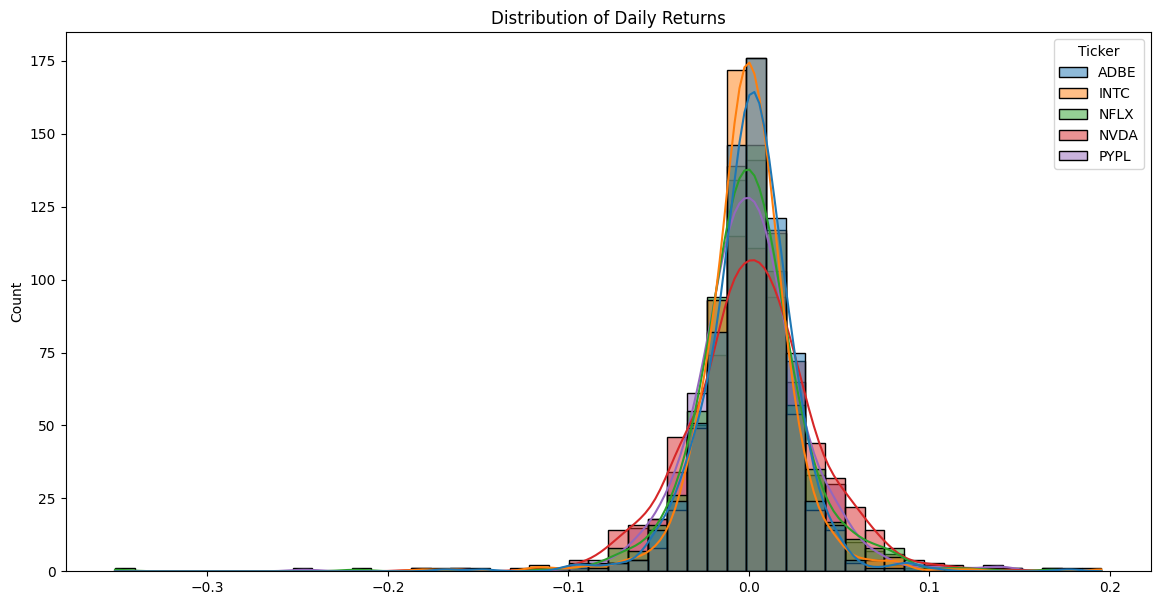

In [5]:
# Visualize the distribution of daily returns
plt.figure(figsize=(14, 7))
sns.histplot(returns, kde=True, bins=50)
plt.title('Distribution of Daily Returns')
plt.show()

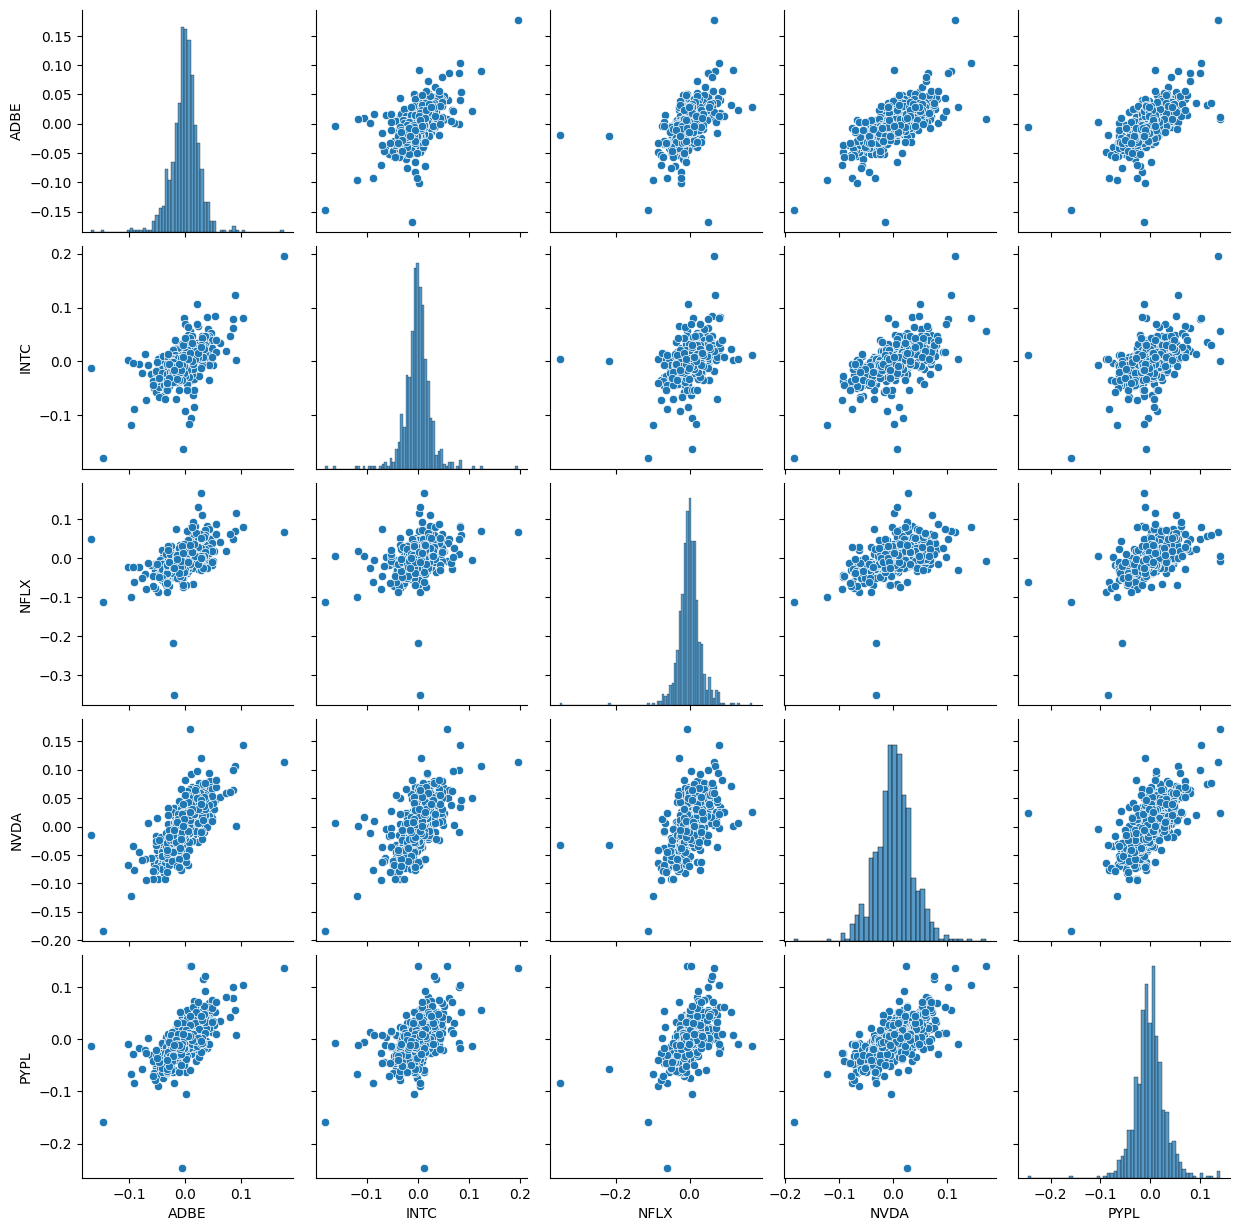

In [6]:
# Pairplot to visualize relationships between assets
sns.pairplot(returns)
plt.savefig('pairplot.png')
plt.show()

# Step 5: Conduct Hypothesis Testing (T-test and 1-Way ANOVA) with Optional Visualizations

In [7]:
# Hypothesis Testing: T-test between NVDA and ADBE
t_test_results = ttest_ind(returns['NVDA'], returns['ADBE'])
print("T-test results between NVDA and ADBE:", t_test_results)

# 1-Way ANOVA among all assets
anova_results = f_oneway(returns['NVDA'], returns['ADBE'], returns['NFLX'], returns['PYPL'], returns['INTC'])
print("ANOVA results:", anova_results)

T-test results between NVDA and ADBE: TtestResult(statistic=0.9075789021526393, pvalue=0.36424575098328626, df=1508.0)
ANOVA results: F_onewayResult(statistic=0.6564352795390223, pvalue=0.6223085126154737)


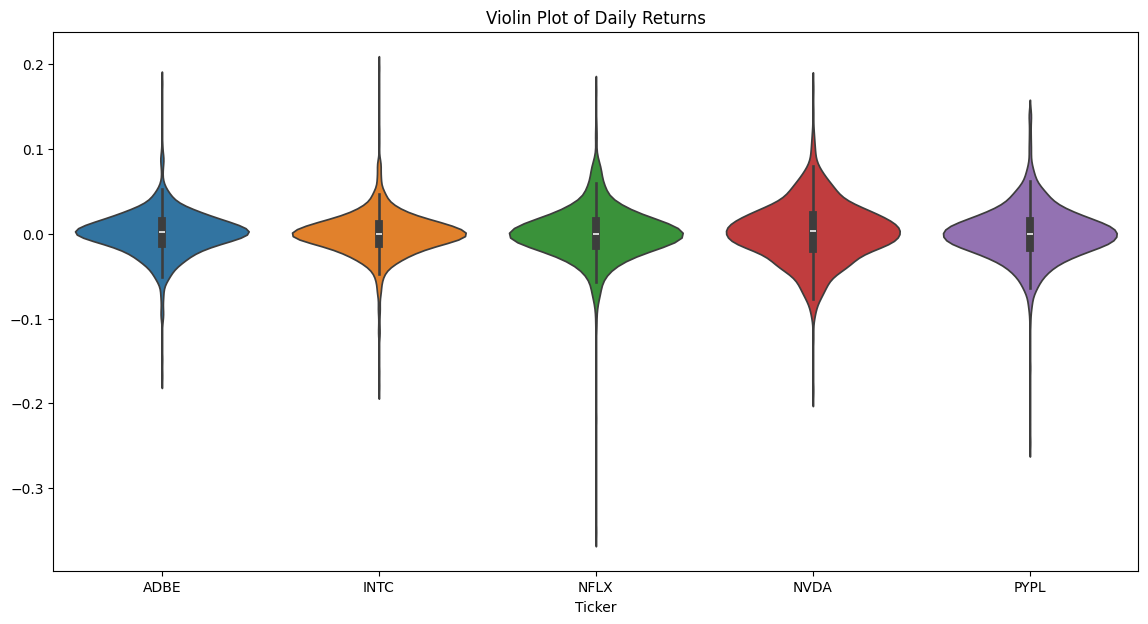

In [8]:
# Visualization: Violin plot to compare distributions
plt.figure(figsize=(14, 7))
sns.violinplot(data=returns)
plt.title('Violin Plot of Daily Returns')
plt.show()

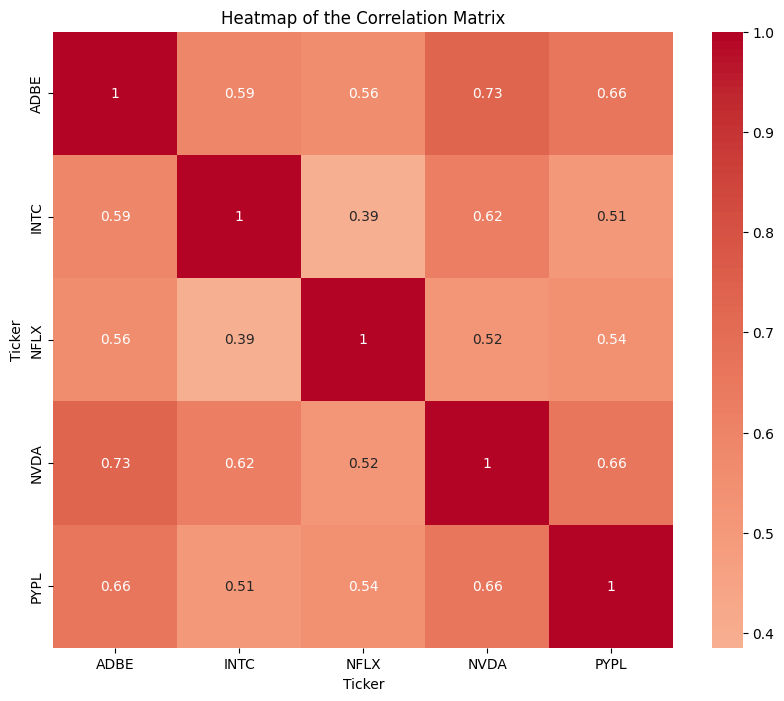

In [9]:
# Visualization: Heatmap of the correlation matrix
correlation_matrix = returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

# Step 6: Perform Linear Regression with Optional Visualizations

Regression results for predicting NVDA:

Coefficients: [0.50578019 0.3314183  0.09537057 0.26451479]
Intercept: 0.001817712666138693


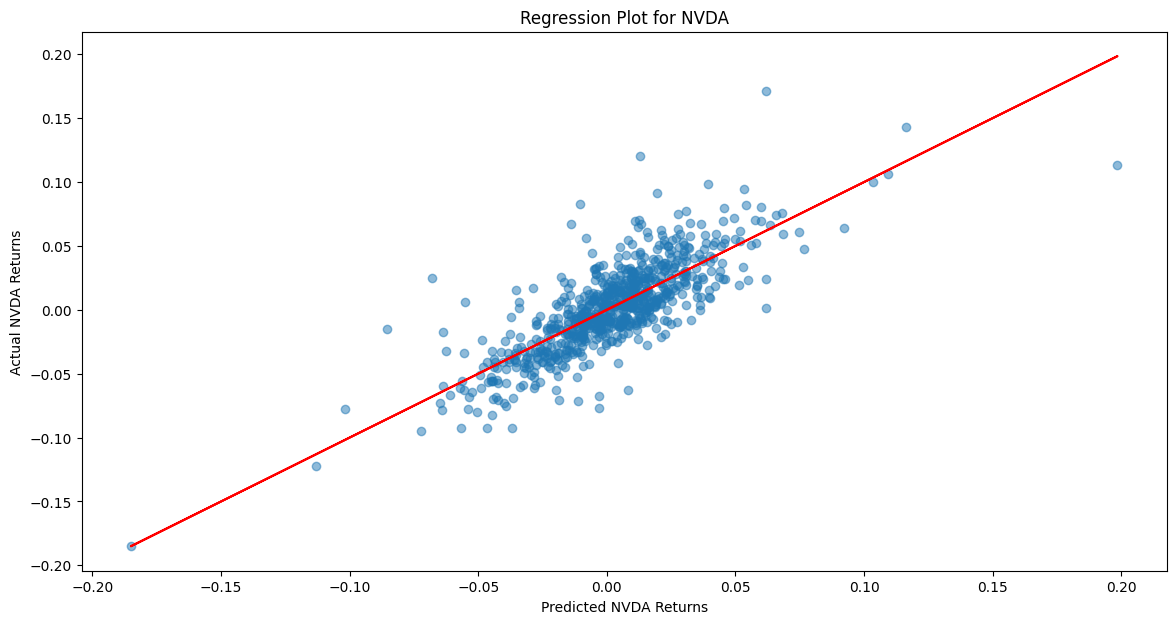

Regression results for predicting ADBE:

Coefficients: [0.16422752 0.13211113 0.28571335 0.19440988]
Intercept: -9.672212841657261e-05


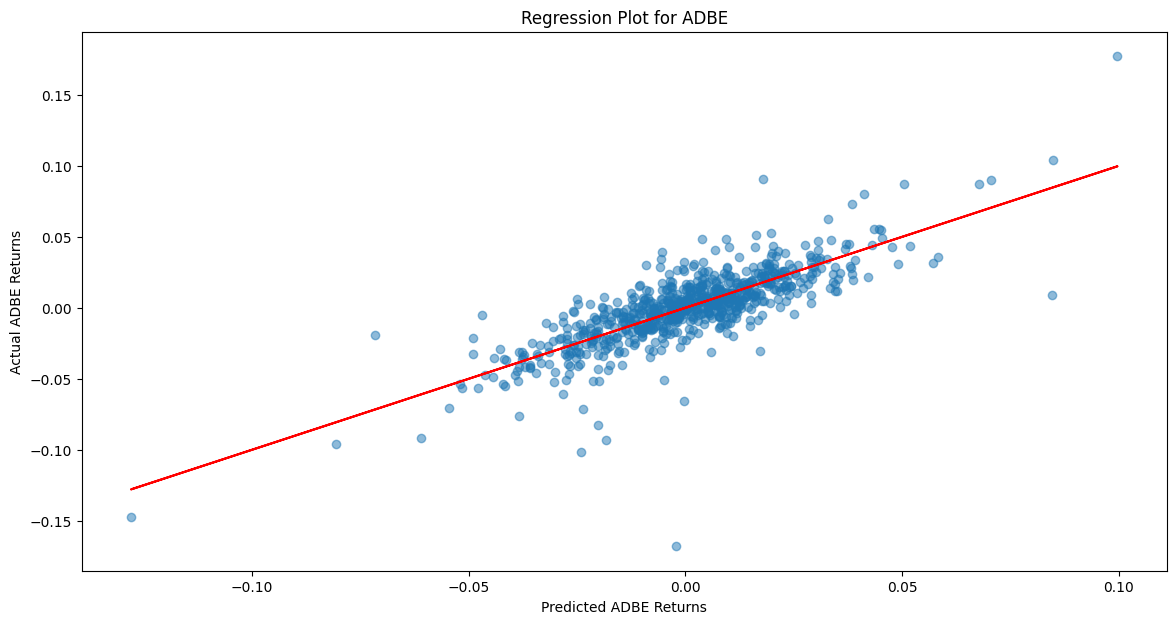

Regression results for predicting NFLX:

Coefficients: [ 0.34197972 -0.0066149   0.1394582   0.2747035 ]
Intercept: 5.684874927522061e-05


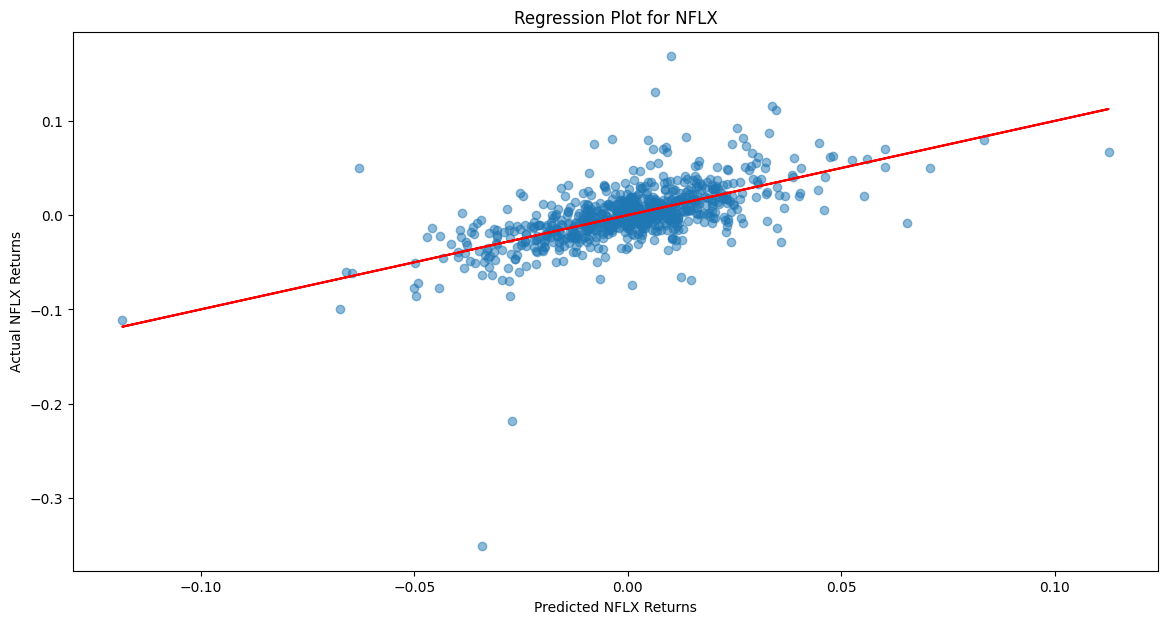

Regression results for predicting PYPL:

Coefficients: [0.35020322 0.08715598 0.19116354 0.26916618]
Intercept: -0.0007135859951109001


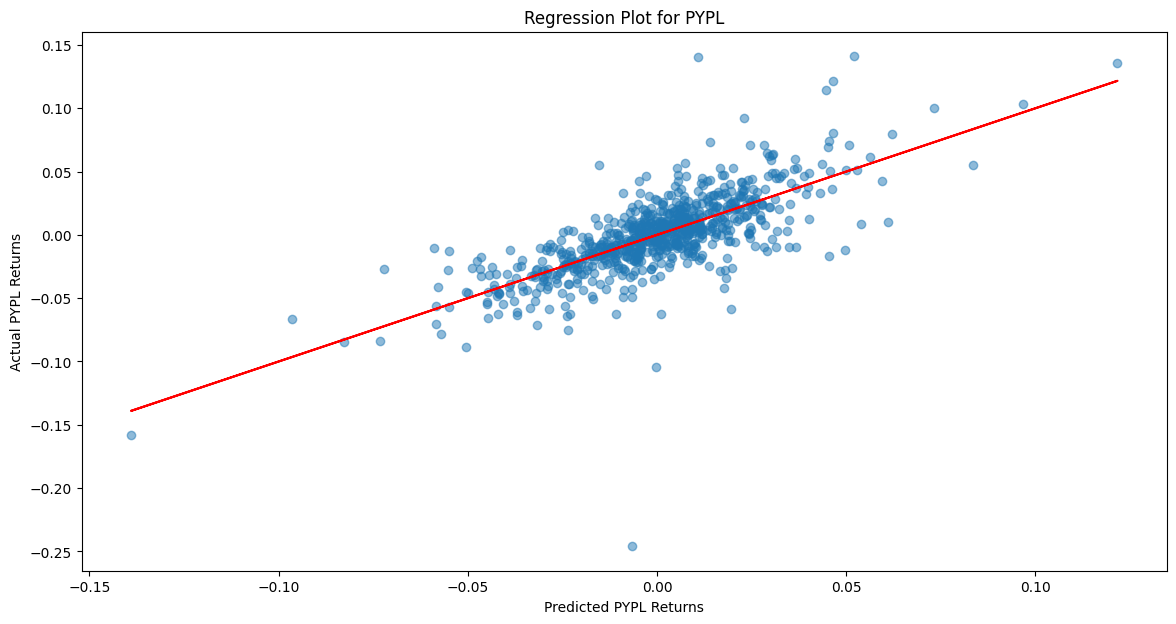

Regression results for predicting INTC:

Coefficients: [ 0.25403448 -0.00395284  0.28959557  0.07484143]
Intercept: -0.0012371851856992292


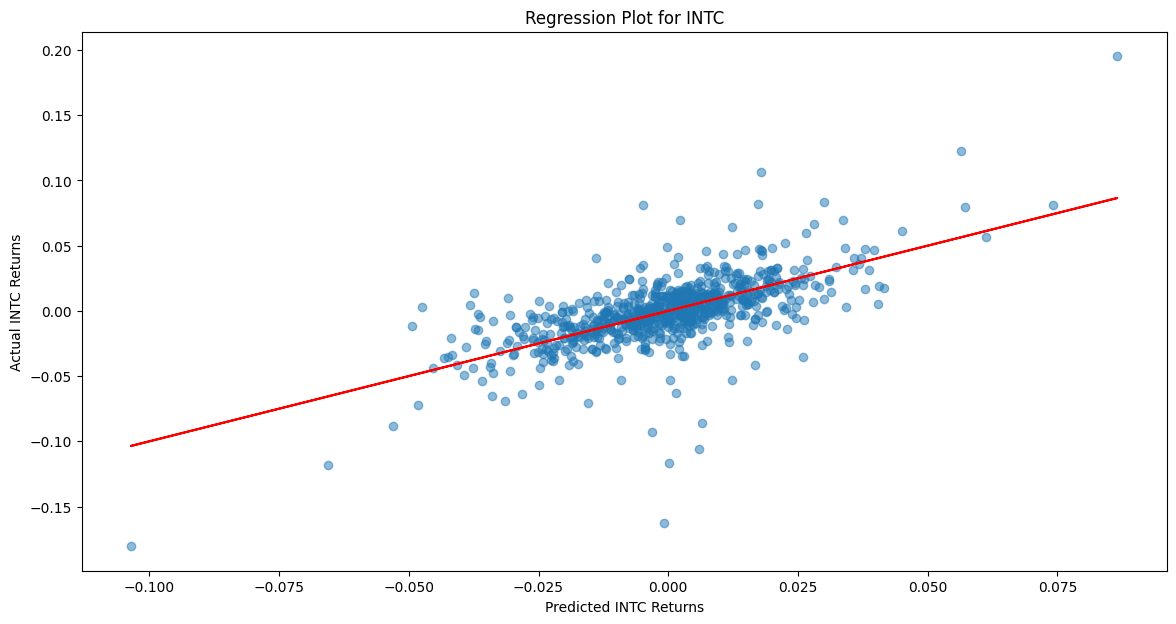

In [10]:
def linear_regression_and_plot(X, y, y_label):
    model = LinearRegression().fit(X, y)
    predicted = model.predict(X)

    print(f"Regression results for predicting {y_label}:\n")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

    plt.figure(figsize=(14, 7))
    plt.scatter(predicted, y, alpha=0.5)
    plt.plot(predicted, predicted, color='red')
    plt.xlabel(f'Predicted {y_label} Returns')
    plt.ylabel(f'Actual {y_label} Returns')
    plt.title(f'Regression Plot for {y_label}')
    plt.show()

for company in assets:
    X = returns.drop(columns=[company])
    y = returns[company]
    linear_regression_and_plot(X, y, company)
